# Supervised Capstone - Recommender model for customer rating based on the features.


![google-play-badge](https://user-images.githubusercontent.com/55968160/75320248-2a008c00-5823-11ea-8bce-77bd8253a558.png)
For this capstone, I will consider a [dataset]('https://www.kaggle.com/gauthamp10/google-playstore-apps') taken from [kaggle]('www.kaggle.com'). 

In order to find the relationship between the features of the applications against rating to see what application types stands out the most. The purpose of this supervised machine learning is to understand the effect of ratings on each application within the Google Play Store. We will divide the capstone in two groups, where first a model is built to rank our data accurately, and the other half will be used to predict and foresee by analysing the features of applications based on the ratings. This will be supported by visualizations from Seaborn and Matplot library to understand the project better.

## STEPS
* EDA (Data cleaning, Data Engineering)
* Visualization
* Machine Learning Modeling : Classification modeling and creating classification reports with cross_valid_scores
* 1-Logistic Regression
* 2-RandomForest Classifier
* 3-KNN Classifier
* 4-Decision Tree
* 5-Support Vector
* 6-Roc curves

Project By: **Sajith Gowthaman**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import cufflinks as cf
cf.go_offline()
import datetime
from sklearn import preprocessing

In [2]:
google_df = pd.read_csv("Google-Playstore-32K.csv")
google_df.head()

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548561573,305034.0,"5,000,000+",Varies with device,0,Everyone,"March 29, 2019",Varies with device,Varies with device
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671482,1207922.0,"100,000,000+",Varies with device,0,Everyone,"March 29, 2019",Varies with device,Varies with device
2,Peapod,SHOPPING,3.656329393,1967.0,"100,000+",1.4M,0,Everyone,"September 20, 2018",5.0 and up,2.2.0
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107232571,389154.0,"10,000,000+",16M,0,Everyone,"March 22, 2019",4.2 and up,4.18.2
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752285,2291.0,"10,000+",Varies with device,$5.99,Everyone,"April 1, 2019",Varies with device,Varies with device


In [3]:
# Please run this to access Pandas Profiling which summarizes the whole dataset.
#!pip install -U pandas-profiling or conda install -c anaconda pandas-profiling

In [4]:
#import pandas_profiling 

#google_df.profile_report()

In [5]:
google_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 11 columns):
App Name           32000 non-null object
Category           32000 non-null object
Rating             32000 non-null object
Reviews            31999 non-null float64
Installs           32000 non-null object
Size               32000 non-null object
Price              32000 non-null object
Content Rating     32000 non-null object
Last Updated       32000 non-null object
Minimum Version    32000 non-null object
Latest Version     31999 non-null object
dtypes: float64(1), object(10)
memory usage: 2.7+ MB


In [6]:
google_df.columns = google_df.columns.str.replace(' ', '_')
google_df.columns = google_df.columns.str.replace('-','_')
google_df.columns = google_df.columns.str.rstrip()
google_df.columns = google_df.columns.str.lstrip()
google_df.columns = google_df.columns.str.replace('/','_')

## Data Cleaning

In [7]:
google_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 11 columns):
App_Name           32000 non-null object
Category           32000 non-null object
Rating             32000 non-null object
Reviews            31999 non-null float64
Installs           32000 non-null object
Size               32000 non-null object
Price              32000 non-null object
Content_Rating     32000 non-null object
Last_Updated       32000 non-null object
Minimum_Version    32000 non-null object
Latest_Version     31999 non-null object
dtypes: float64(1), object(10)
memory usage: 2.7+ MB


### understanding the data: 
we can drop the columns that are of not much use to us. Also, we notice a high number of objects which can be converted to floats for machine learning purpose.

In [8]:
google_df.drop(['App_Name', 'Last_Updated','Latest_Version','Minimum_Version'], inplace=True, axis = 1)

### Renaming the columns names to a format that can be used to acquire the median for machine learning purpose.

In [9]:
googe_df = google_df.rename(index =str, columns={'Content Rating': 'Content_Rating', 'App Name':'App'})

In [10]:
google_df.dropna(inplace = True)

## Reviews

In [11]:
google_df.Reviews.unique()

array([ 305034., 1207922.,    1967., ...,   11214.,   14039.,    1796.])

In [12]:
import statistics
statistics.median(google_df['Reviews'])

1463.0

### Rating

In [13]:
google_df['Rating'].unique()

array(['4.548561573', '4.400671482', '3.656329393', ..., '3.521126747',
       '3.994588852', '4.224199295'], dtype=object)

In [14]:
## Let's get the values that cannot be converted to float.
for column_name in ["Rating"]:
    print("These are the problematic values for the variable: {}".format(column_name))
    for value in google_df[column_name]:
        try:
            float(value)
        except:
            print(value)

These are the problematic values for the variable: Rating
GAME_STRATEGY
NEWS_AND_MAGAZINES


In [15]:
google_df.Rating = google_df.Rating.replace('GAME_STRATEGY', np.nan).replace('NEWS_AND_MAGAZINES', np.nan)

In [16]:
google_df.Rating = pd.to_numeric(google_df["Rating"], errors = 'coerce')
google_df["Rating"].fillna(google_df["Rating"].mean(), inplace = True)

In [17]:
# Rounding the Rating column by two decimals.
google_df.Rating = google_df.Rating.round()

In [18]:
google_df.head()

,Category,Rating,Reviews,Installs,Size,Price,Content_Rating
0,FOOD_AND_DRINK,5.0,305034.0,"5,000,000+",Varies with device,0,Everyone
1,TRAVEL_AND_LOCAL,4.0,1207922.0,"100,000,000+",Varies with device,0,Everyone
2,SHOPPING,4.0,1967.0,"100,000+",1.4M,0,Everyone
3,FOOD_AND_DRINK,4.0,389154.0,"10,000,000+",16M,0,Everyone
4,FOOD_AND_DRINK,5.0,2291.0,"10,000+",Varies with device,$5.99,Everyone


In [19]:
import statistics

statistics.median(google_df['Rating'])
print('The median of Rating is: {}'.format(statistics.median(google_df['Rating'])))

The median of Rating is: 4.0


In [20]:
google_df.Rating.unique()

array([5., 4., 3., 2., 1.])

In [21]:
google_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31999 entries, 0 to 31999
Data columns (total 7 columns):
Category          31999 non-null object
Rating            31999 non-null float64
Reviews           31999 non-null float64
Installs          31999 non-null object
Size              31999 non-null object
Price             31999 non-null object
Content_Rating    31999 non-null object
dtypes: float64(2), object(5)
memory usage: 2.0+ MB


### Price

In [22]:
# The "Price" column consists of a string named 'Varies with device' and '2.4M'
# Let's fill the string with na. It is not practical for an application to cost 2.4 million.


google_df.Price = google_df.Price.str.strip("$")

In [23]:
google_df.Price

0           0
1           0
2           0
3           0
4        5.99
         ... 
31995       0
31996       0
31997       0
31998       0
31999       0
Name: Price, Length: 31999, dtype: object

In [24]:
# Let's replace the missing values by taking the mean.

google_df.Price = pd.to_numeric(google_df["Price"], errors='coerce')

google_df["Price"].fillna(google_df["Price"].mean(), inplace = True)

In [25]:
google_df.Price.unique()

array([0.00000000e+00, 5.99000000e+00, 2.99000000e+00, 1.99000000e+00,
       6.99000000e+00, 4.99000000e+00, 3.99000000e+00, 9.99000000e+00,
       9.90000000e-01, 3.49000000e+00, 1.39900000e+01, 7.99000000e+00,
       4.95000000e+00, 5.49000000e+00, 3.99900000e+01, 8.99000000e+00,
       1.49000000e+00, 7.49000000e+00, 3.99990000e+02, 2.49000000e+00,
       1.09900000e+01, 2.20000000e+00, 1.25000000e+00, 1.19900000e+01,
       1.49900000e+01, 7.49900000e+01, 9.99900000e+01, 9.00000000e+00,
       2.49900000e+01, 1.00000000e+01, 4.89000000e+00, 4.49000000e+00,
       1.59900000e+01, 3.22000000e+00, 3.55000000e+00, 1.29900000e+01,
       2.39900000e+01, 3.75000000e+00, 6.49000000e+00, 1.99900000e+01,
       3.95000000e+00, 3.29900000e+01, 1.26000000e+00, 2.10000000e+01,
       9.79000000e+00, 7.99900000e+01, 6.29000000e+00, 1.19000000e+00,
       3.85000000e+00, 1.29000000e+00, 2.99900000e+01, 1.00000000e+00,
       3.29000000e+00, 5.49900000e+01, 1.40000000e+00, 4.00000000e+00,
      

## Category

In [26]:
google_df.Category.unique()

array(['FOOD_AND_DRINK', 'TRAVEL_AND_LOCAL', 'SHOPPING', 'LIFESTYLE',
       'GAME_ACTION', 'GAME_CASUAL', 'GAME_ROLE_PLAYING', 'GAME_PUZZLE',
       'GAME_RACING', 'GAME_ADVENTURE', 'GAME_ARCADE', 'GAME_STRATEGY',
       'GAME_SPORTS', 'GAME_SIMULATION', 'GAME_MUSIC', 'MUSIC_AND_AUDIO',
       'FINANCE', 'EVENTS', 'ENTERTAINMENT', 'EDUCATION',
       'GAME_EDUCATIONAL', 'BOOKS_AND_REFERENCE', 'NEWS_AND_MAGAZINES',
       'PHOTOGRAPHY', 'VIDEO_PLAYERS', 'GAME_WORD', 'ART_AND_DESIGN',
       'GAME_TRIVIA', 'GAME_BOARD', 'BUSINESS', 'PRODUCTIVITY',
       'COMMUNICATION', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'SOCIAL',
       'BEAUTY', 'GAME_CASINO', 'MAPS_AND_NAVIGATION', 'PERSONALIZATION',
       'GAME_CARD', 'TOOLS', 'SPORTS', 'AUTO_AND_VEHICLES',
       'LIBRARIES_AND_DEMO', 'COMICS', 'PARENTING', 'DATING', 'WEATHER',
       'MEDICAL', ')', ' Channel 2 News'], dtype=object)

In [27]:
google_df.Category = google_df.replace(')','app')

In [28]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
google_df['Category_Code'] = LE.fit_transform(google_df['Category'])

google_df['Category_Code'].unique()

array([13, 47, 43, 34, 14, 20, 25, 23, 24, 15, 16, 28, 27, 26, 22, 37, 12,
       11, 10,  9, 21,  4, 38, 41, 48, 30,  1, 29, 17,  5, 42,  7, 31, 32,
       44,  3, 19, 35, 40, 18, 46, 45,  2, 33,  6, 39,  8, 49, 36, 50,  0])

## Content Rating

In [29]:
google_df.Content_Rating.unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', '$0.99', '0'], dtype=object)

In [30]:
# Drop the unwanted values such as "$0.99",  "0".
google_df["Content_Rating"] = google_df["Content_Rating"].replace("$0.99", np.nan).replace("0", np.nan)

In [31]:
# Let's convert the Content_Rating column to string format
google_df["Content_Rating"] = google_df["Content_Rating"].astype(str)

In [32]:
# one-hot encoding the Grade variable: 

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
google_df["Content_PG"] = LE.fit_transform(google_df["Content_Rating"])

google_df["Content_PG"].unique()

array([1, 4, 2, 3, 0, 5, 6])

In [33]:
google_df.head()

,Category,Rating,Reviews,Installs,Size,Price,Content_Rating,Category_Code,Content_PG
0,FOOD_AND_DRINK,5.0,305034.0,"5,000,000+",Varies with device,0.00,Everyone,13,1
1,TRAVEL_AND_LOCAL,4.0,1207922.0,"100,000,000+",Varies with device,0.00,Everyone,47,1
2,SHOPPING,4.0,1967.0,"100,000+",1.4M,0.00,Everyone,43,1
3,FOOD_AND_DRINK,4.0,389154.0,"10,000,000+",16M,0.00,Everyone,13,1
4,FOOD_AND_DRINK,5.0,2291.0,"10,000+",Varies with device,5.99,Everyone,13,1


## Installs

In [34]:
google_df.Installs.unique()

array(['5,000,000+', '100,000,000+', '100,000+', '10,000,000+', '10,000+',
       '1,000,000+', '50,000,000+', '500,000+', '50,000+', '5,000+',
       '1,000+', '500,000,000+', '1,000,000,000+', '5,000,000,000+',
       '100+', '500+', '50+', '5+', '10+', '1+', '6', '11976', '0+'],
      dtype=object)

In [35]:
google_df.Installs = google_df.Installs.str.strip("+")
google_df.Installs = google_df.Installs.str.replace(',','')

In [36]:
google_df.Installs = pd.to_numeric(google_df["Installs"], errors = 'coerce')

In [37]:
#Normalizing the variable "Installs"
google_df["Installs"] = ((google_df["Installs"]) - (google_df["Installs"].min())) / ((google_df["Installs"].max()) - (google_df["Installs"].min()))

In [38]:
google_df.Installs.unique()

array([1.0000e-03, 2.0000e-02, 2.0000e-05, 2.0000e-03, 2.0000e-06,
       2.0000e-04, 1.0000e-02, 1.0000e-04, 1.0000e-05, 1.0000e-06,
       2.0000e-07, 1.0000e-01, 2.0000e-01, 1.0000e+00, 2.0000e-08,
       1.0000e-07, 1.0000e-08, 1.0000e-09, 2.0000e-09, 2.0000e-10,
       1.2000e-09, 2.3952e-06, 0.0000e+00])

## Size

In [39]:
google_df.Size.unique()

array(['Varies with device', '1.4M', '16M', '23M', '4.1M', '39M', '8.1M',
       '19M', '30M', '11M', '14M', '38M', '15M', '55M', '7.8M', '17M',
       '62M', '22M', '25M', '46M', '9.5M', '78M', '13M', '72M', '81M',
       '44M', '24M', '99M', '37M', '63M', '45M', '20M', '34M', '79M',
       '35M', '36M', '54M', '40M', '90M', '97M', '27M', '82M', '58M',
       '43M', '64M', '47M', '50M', '33M', '84M', '89M', '69M', '52M',
       '101M', '71M', '66M', '12M', '18M', '56M', '9.3M', '3.4M', '48M',
       '31M', '51M', '49M', '21M', '4.8M', '4.7M', '26M', '32M', '2.9M',
       '9.4M', '10M', '76M', '93M', '3.0M', '41M', '29M', '42M', '94M',
       '75M', '4.0M', '73M', '2.4M', '7.7M', '9.7M', '6.6M', '2.7M',
       '57M', '59M', '8.4M', '8.6M', '70M', '6.1M', '8.3M', '2.0M',
       '7.0M', '2.5M', '28M', '6.9M', '7.1M', '5.7M', '4.4M', '686k',
       '4.3M', '4.2M', '3.6M', '8.7M', '3.3M', '7.3M', '10.0M', '7.6M',
       '1.7M', '98M', '4.5M', '6.5M', '65M', '6.2M', '80M', '85M', '86M',
   

In [40]:
google_df.Size = google_df.Size.str.strip("+")
google_df.Size = google_df.Size.str.replace(',','')

In [41]:
google_df.Size = google_df.Size.replace('Varies with device',np.nan)

In [42]:
## To simplify our machine learning model, we will multiply the "M" or the Megabytes with 1000000 and "k" or Kilobytes with 10000.

google_df.Size = (google_df.Size.replace(r'[kM]+$', '', regex=True).astype(float) * google_df.Size.str.extract(r'[\d\.]+([kM]+)', expand=False).fillna(1).replace(['k','M'], [10**3, 10**6]).astype(int))

In [43]:
google_df.Size.unique()

array([      nan, 1.400e+06, 1.600e+07, 2.300e+07, 4.100e+06, 3.900e+07,
       8.100e+06, 1.900e+07, 3.000e+07, 1.100e+07, 1.400e+07, 3.800e+07,
       1.500e+07, 5.500e+07, 7.800e+06, 1.700e+07, 6.200e+07, 2.200e+07,
       2.500e+07, 4.600e+07, 9.500e+06, 7.800e+07, 1.300e+07, 7.200e+07,
       8.100e+07, 4.400e+07, 2.400e+07, 9.900e+07, 3.700e+07, 6.300e+07,
       4.500e+07, 2.000e+07, 3.400e+07, 7.900e+07, 3.500e+07, 3.600e+07,
       5.400e+07, 4.000e+07, 9.000e+07, 9.700e+07, 2.700e+07, 8.200e+07,
       5.800e+07, 4.300e+07, 6.400e+07, 4.700e+07, 5.000e+07, 3.300e+07,
       8.400e+07, 8.900e+07, 6.900e+07, 5.200e+07, 1.010e+08, 7.100e+07,
       6.600e+07, 1.200e+07, 1.800e+07, 5.600e+07, 9.300e+06, 3.400e+06,
       4.800e+07, 3.100e+07, 5.100e+07, 4.900e+07, 2.100e+07, 4.800e+06,
       4.700e+06, 2.600e+07, 3.200e+07, 2.900e+06, 9.400e+06, 1.000e+07,
       7.600e+07, 9.300e+07, 3.000e+06, 4.100e+07, 2.900e+07, 4.200e+07,
       9.400e+07, 7.500e+07, 4.000e+06, 7.300e+07, 

In [44]:
google_df["Size"]=google_df["Size"].apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()
google_df.Size = pd.to_numeric(google_df["Size"], errors = 'coerce')
google_df["Size"].fillna(google_df["Size"].mean(), inplace = True)

In [45]:
# Normalizing the variable "Size"
google_df["Size"] = ((google_df["Size"]) - (google_df["Size"].min())) / ((google_df["Size"].max()) - (google_df["Size"].min()))

In [46]:
google_df["Size"].unique()

array([6.47132920e-02, 4.03429511e-03, 4.61092352e-02, 6.62821517e-02,
       1.18152772e-02, 1.12391675e-01, 2.33426580e-02, 5.47547708e-02,
       8.64550681e-02, 3.17000091e-02, 4.03455448e-02, 1.09509830e-01,
       4.32273900e-02, 1.58501198e-01, 2.24781045e-02, 4.89910804e-02,
       1.78674115e-01, 6.34003065e-02, 7.20458421e-02, 1.32564592e-01,
       2.73772413e-02, 2.24783638e-01, 3.74636996e-02, 2.07492567e-01,
       2.33429174e-01, 1.26800901e-01, 6.91639969e-02, 2.85302388e-01,
       1.06627985e-01, 1.81555960e-01, 1.29682746e-01, 5.76366160e-02,
       9.79824490e-02, 2.27665483e-01, 1.00864294e-01, 1.03746139e-01,
       1.55619353e-01, 1.15273520e-01, 2.59365781e-01, 2.79538697e-01,
       7.78095325e-02, 2.36311019e-01, 1.67146734e-01, 1.23919056e-01,
       1.84437805e-01, 1.35446437e-01, 1.44091972e-01, 9.51006038e-02,
       2.42074710e-01, 2.56483936e-01, 1.98847031e-01, 1.49855663e-01,
       2.91066078e-01, 2.04610722e-01, 1.90201496e-01, 3.45818543e-02,
      

## Paid or Free app

In [47]:
## Lets set a function to return the category type of the app (free/paid).
result = []
for Price in google_df['Price']:
    if Price == 0:
        result.append('0')
    else:
        result.append('1')

In [48]:
## Here we are appending 0 as free apps and 1 as paid apps and insert it into the dataframe
google_df['pf'] = result

In [49]:
google_df.pf = pd.to_numeric(google_df["pf"], errors = 'coerce')

### Now there all the variables except categories are in either float or integer form which is desired for Machine Learning purposes. Lets get an idea of the data distribution and proceed with visualization to kickstart the ML process.

In [50]:
google_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31999 entries, 0 to 31999
Data columns (total 10 columns):
Category          31999 non-null object
Rating            31999 non-null float64
Reviews           31999 non-null float64
Installs          31999 non-null float64
Size              31999 non-null float64
Price             31999 non-null float64
Content_Rating    31999 non-null object
Category_Code     31999 non-null int64
Content_PG        31999 non-null int64
pf                31999 non-null int64
dtypes: float64(5), int64(3), object(2)
memory usage: 2.7+ MB


In [51]:
google_df.describe()

,Rating,Reviews,Installs,Size,Price,Category_Code,Content_PG,pf
count,31999.000000,3.199900e+04,31999.000000,31999.000000,31999.000000,31999.000000,31999.000000,31999.000000
mean,4.265821,9.849088e+04,0.000825,0.064713,0.290158,24.733648,1.340542,0.064033
std,0.630965,1.173711e+06,0.011744,0.063215,3.320367,14.955881,0.895714,0.244816
min,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.390000e+02,0.000002,0.018155,0.000000,10.000000,1.000000,0.000000
50%,4.000000,1.463000e+03,0.000020,0.046109,0.000000,23.000000,1.000000,0.000000
75%,5.000000,1.443950e+04,0.000200,0.080691,0.000000,39.000000,1.000000,0.000000
max,5.000000,8.621429e+07,1.000000,1.000000,399.990000,50.000000,6.000000,1.000000


### Before we move further to visualizations, lets remove any existing outliers that could affect our data.

In [52]:
q75, q25 = np.percentile(google_df["Reviews"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((google_df["Reviews"] > max_val) 
                      | (google_df["Reviews"] < min_val))[0]))
    ))


The score threshold is: 1.0
Number of outliers is: 5944
The score threshold is: 1.5
Number of outliers is: 5303
The score threshold is: 2.0
Number of outliers is: 4835
The score threshold is: 2.5
Number of outliers is: 4459
The score threshold is: 3.0
Number of outliers is: 4159
The score threshold is: 3.5
Number of outliers is: 3878
The score threshold is: 4.0
Number of outliers is: 3676
The score threshold is: 4.5
Number of outliers is: 3469


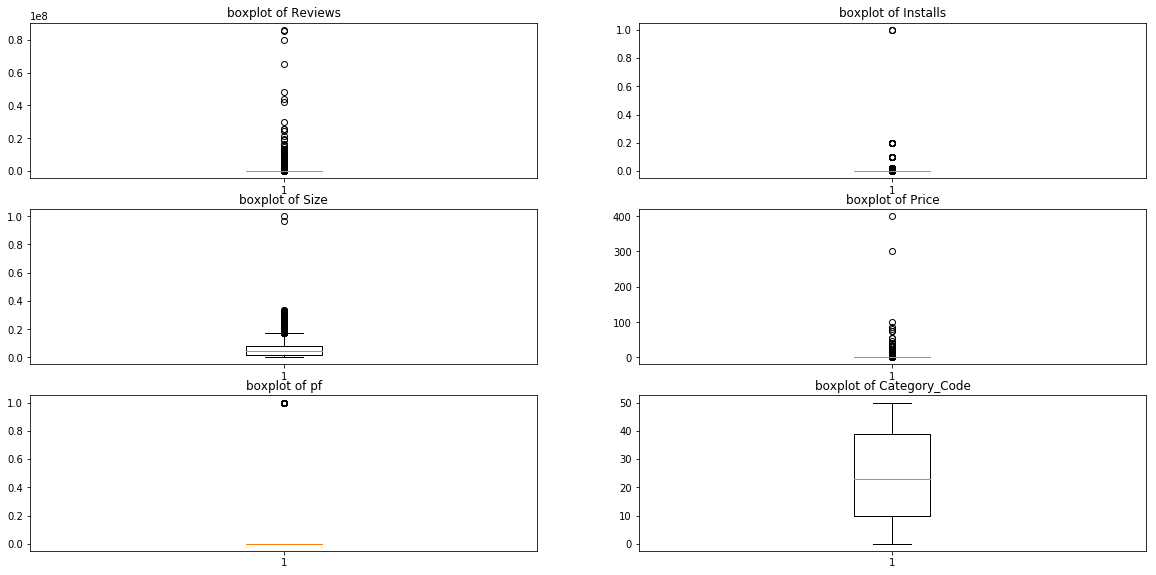

In [53]:
plt.figure(figsize = (20,20))

List = ['Reviews', 'Installs', 'Size', 'Price','pf', 'Category_Code']

for i, col in enumerate (List):
    plt.subplot(len(List),2,i+1)
    plt.boxplot(google_df[col])
    plt.title("boxplot of {}".format(col))
    
plt.show()

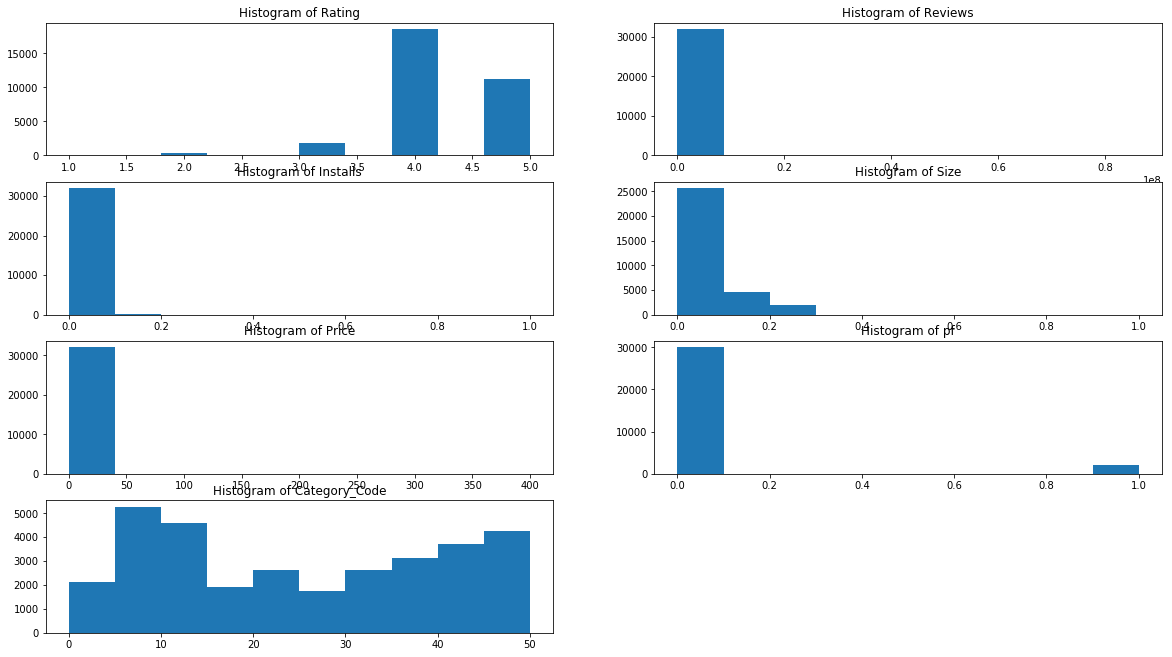

In [54]:
plt.figure(figsize = (20,20))

List = ['Rating', 'Reviews', 'Installs', 'Size', 'Price','pf', 'Category_Code']

for i, col in enumerate (List):
    plt.subplot(len(List),2,i+1)
    plt.hist(google_df[col])
    plt.title("Histogram of {}".format(col))
    
plt.show()

In [55]:
google_df["Reviews"] = (np.log(google_df["Reviews"]))
#google_df["Rating"] = (np.log(google_df["Rating"]))

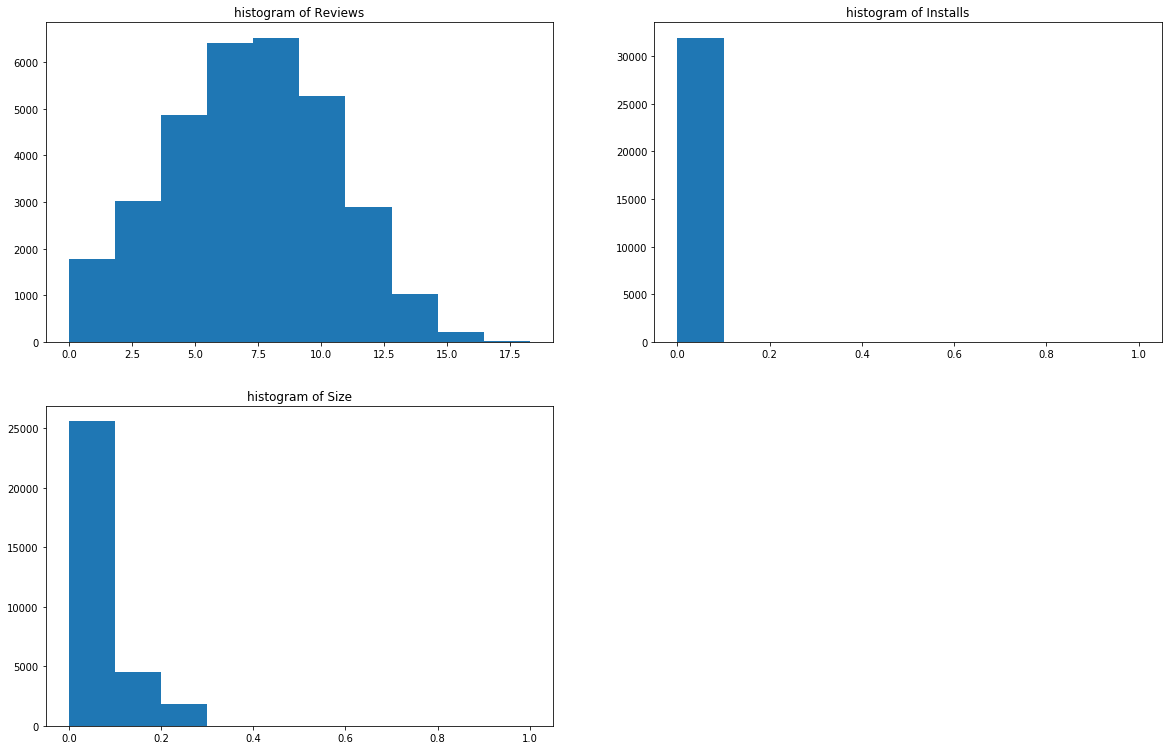

In [56]:
plt.figure(figsize = (20,20))

List = ['Reviews', 'Installs', 'Size']

for i, col in enumerate (List):
    plt.subplot(len(List),2,i+1)
    plt.hist((google_df[col]))
    plt.title("histogram of {}".format(col))
    
plt.show()

We will take the log of the variables containing outliers and plot a histgram to check for normality. Variable "Price" contains a lot of 0 values that cannot be used to take log value. Let's **Winsorize** Price alone.

In [57]:
from scipy.stats.mstats import winsorize

google_df["Price"] = winsorize(google_df["Price"], (0.10, 0.05))

google_df["Installs"] = winsorize(google_df["Installs"], (0, 0.05))

google_df["Size"] = winsorize(google_df["Size"], (0,0.05))

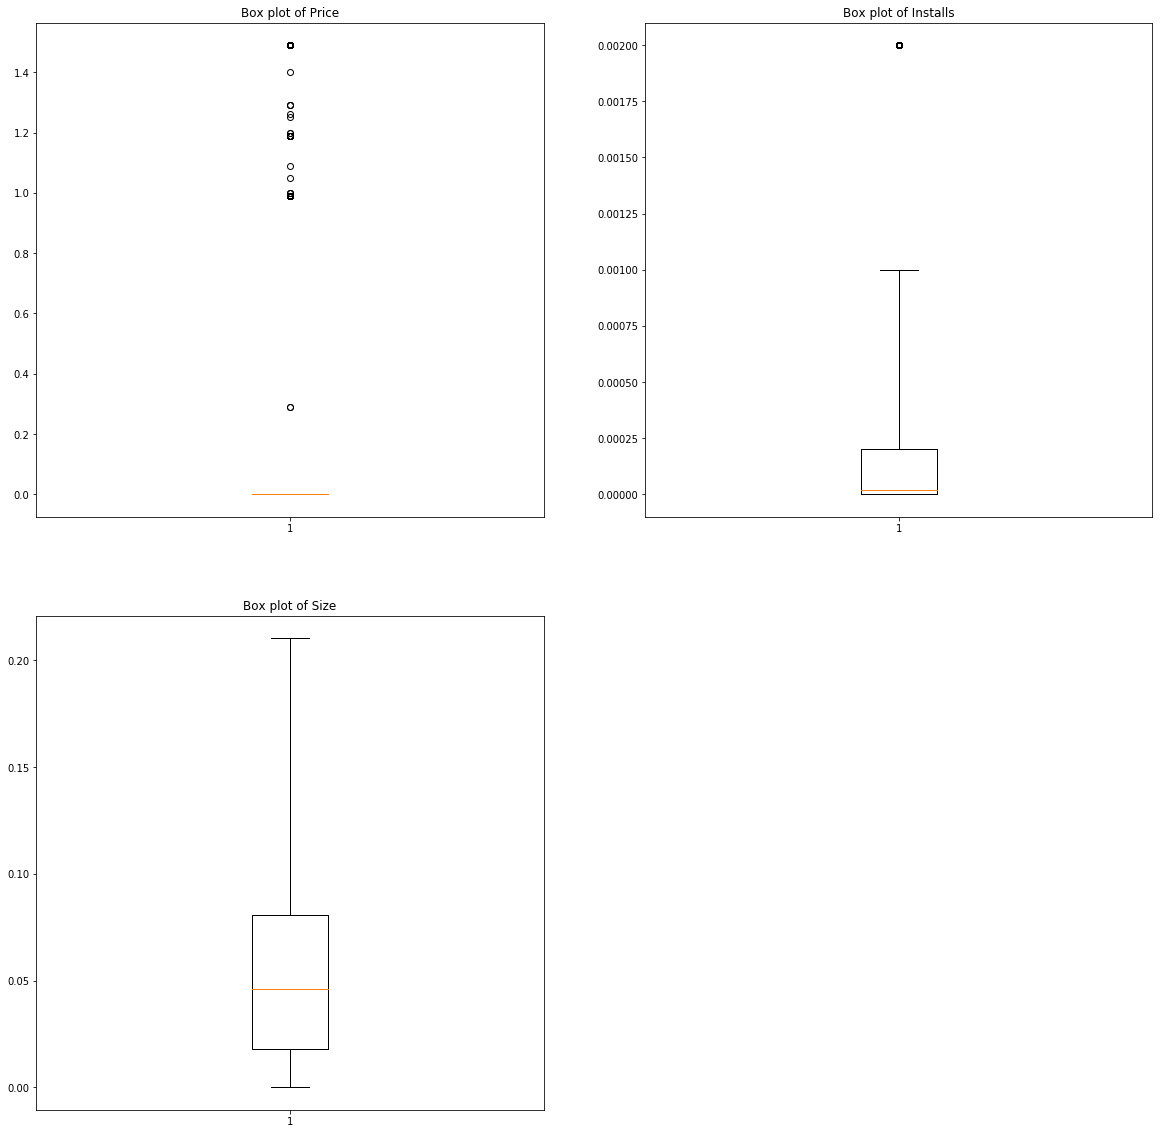

In [58]:
plt.figure(figsize = (20,20))

plt.subplot(2,2,1)
plt.boxplot(google_df["Price"], whis = 5)
plt.title("Box plot of Price")


plt.subplot(2,2,2)
plt.boxplot(google_df["Installs"], whis = 5)
plt.title("Box plot of Installs")

plt.subplot(2,2,3)
plt.boxplot(google_df["Size"], whis = 5)
plt.title("Box plot of Size")
plt.show()



### The data is now completely cleaned and can be used for visualization and machine learning.

## Visualization

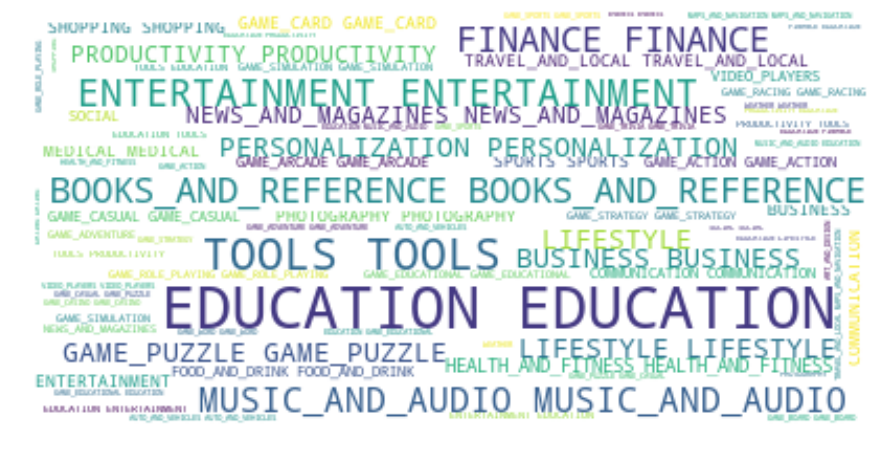

In [59]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(" ".join(google_df["Category"]))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

#### We can see that the top categories of apps were found under Education, Music and Tools

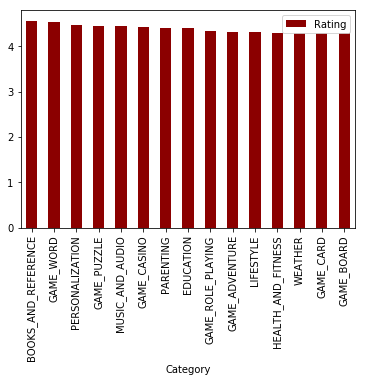

In [60]:
# Let's use plotly to plot an interactive grpah that shows us the rating for to top 20 categories.

grouped = google_df.pivot_table(values = 'Rating', index = 'Category', aggfunc = np.mean)
Rating_Category = grouped.sort_values(by = 'Rating', ascending = False)
Rating_Category_head = Rating_Category.head(15)
Rating_Category_head
Rating_Category_head.plot(kind = 'bar', color = "darkred")

In [61]:
##Let's drop the category and content rating column as we have assigned numerical values to it already
google_df.drop(columns = ["Category"], inplace = True, axis=1)
google_df.drop(columns = ["Content_Rating"], inplace = True, axis = 1)

In [62]:
sns.set_palette("GnBu_d")
sns.set_style('darkgrid')

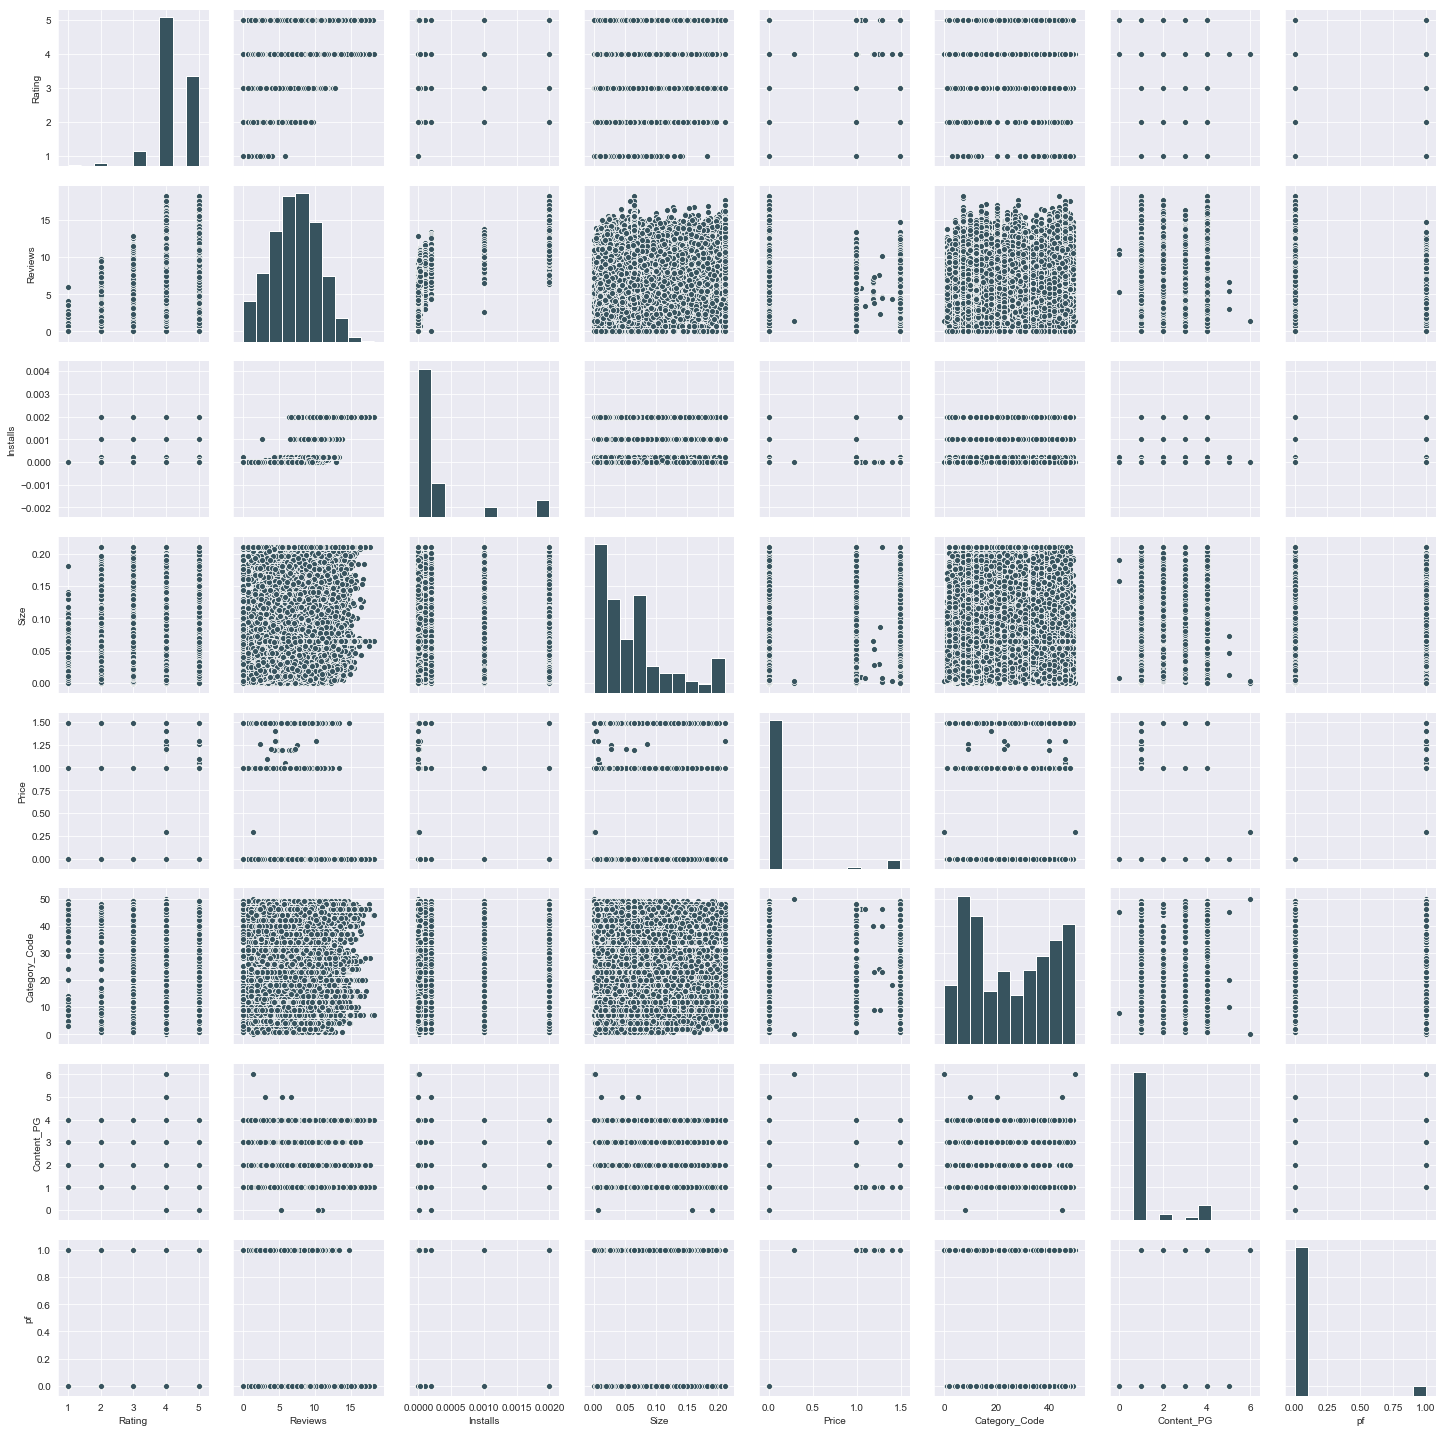

In [63]:
sns.pairplot(google_df)

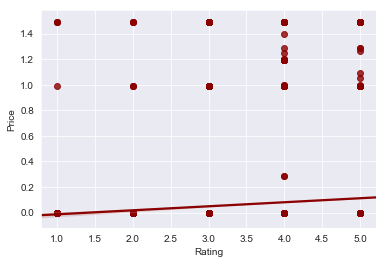

In [64]:
sns.regplot(x='Rating', y='Price', color = 'darkred', data= google_df)

### We can see that most of the apps cost from  0-50 dollars. As the rating increases we see an increase in the price of the application.

#### The most expensive application from the store is about 400 dollars, followed by another app costing $300~. 

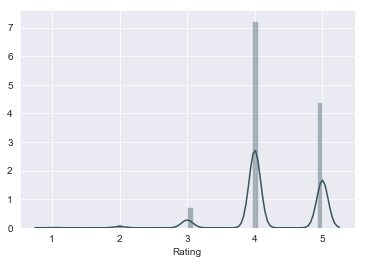

In [65]:
sns.distplot(google_df["Rating"])
plt.show()

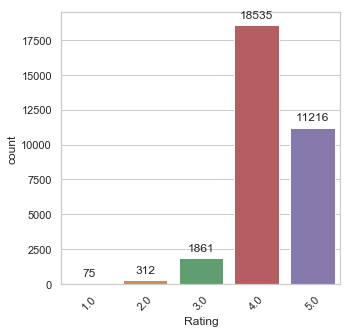

In [66]:
plt.figure(figsize = (5,5))
google_df['Rating'].value_counts()

import seaborn as sns

sns.set(style="whitegrid")
splot = sns.countplot(x="Rating",data=google_df[['Rating']])
plt.xticks(rotation = 45)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., 
                    p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

#### The apps present in the dataset are mostly rated from 3-5. The highest amount is present between 4 and 5 ratings.

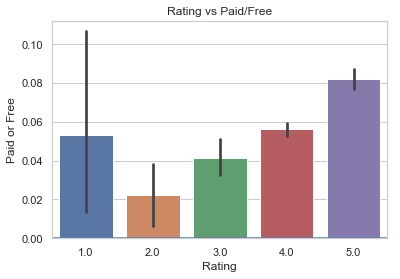

In [67]:
grouped = google_df.pivot_table(values = 'Rating', index = 'pf', aggfunc = np.mean)
sns.barplot(google_df.Rating, google_df.pf)
plt.xlabel('Rating')
plt.ylabel('Paid or Free')
plt.axhline(y=0)
plt.title('Rating vs Paid/Free')
plt.show()

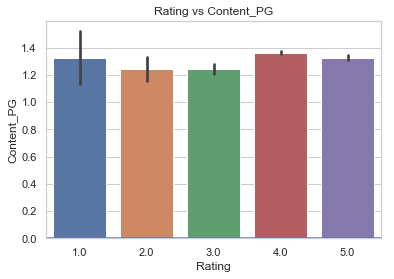

In [68]:
## Barplot of Rating and Content Rating

sns.barplot(google_df.Rating, google_df.Content_PG)
plt.xlabel('Rating')
plt.ylabel('Content_PG')
plt.axhline(y=0)
plt.title('Rating vs Content_PG')
plt.show()

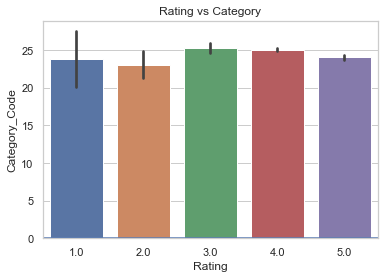

In [69]:
sns.barplot(google_df.Rating, google_df.Category_Code)
plt.xlabel('Rating')
plt.ylabel('Category_Code')
plt.axhline(y=0)
plt.title('Rating vs Category')
plt.show()

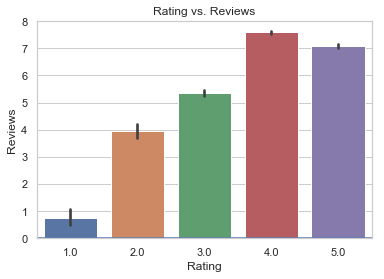

In [70]:
sns.barplot(google_df.Rating, google_df.Reviews)
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.axhline(y=0)
plt.title('Rating vs. Reviews')
plt.show()

In [71]:
google_df.corr()

,Rating,Reviews,Installs,Size,Price,Category_Code,Content_PG,pf
Rating,1.000000,0.082724,-0.007408,0.006209,0.057317,-0.024310,0.004277,0.055098
Reviews,0.082724,1.000000,0.648614,0.259061,-0.094112,0.096049,0.155665,-0.097465
Installs,-0.007408,0.648614,1.000000,0.183737,-0.111850,0.066757,0.112766,-0.112782
Size,0.006209,0.259061,0.183737,1.000000,0.044991,-0.079546,0.147196,0.045053
Price,0.057317,-0.094112,-0.111850,0.044991,1.000000,0.009941,0.018494,0.989925
Category_Code,-0.024310,0.096049,0.066757,-0.079546,0.009941,1.000000,-0.029386,0.012502
Content_PG,0.004277,0.155665,0.112766,0.147196,0.018494,-0.029386,1.000000,0.020840
pf,0.055098,-0.097465,-0.112782,0.045053,0.989925,0.012502,0.020840,1.000000


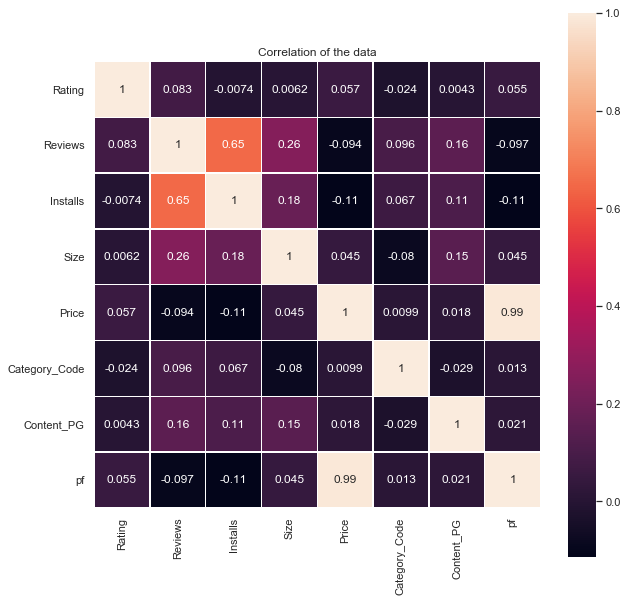

In [72]:
plt.figure(figsize=(10, 10))
sns.heatmap(google_df.corr(), square=True, annot=True, linewidths=.5)
plt.title("Correlation of the data")
plt.show()

#### Reviews and installs were highly correlated. It is clear that the number of install depends on the number of reviews for the app.

In [73]:
google_df.head()

,Rating,Reviews,Installs,Size,Price,Category_Code,Content_PG,pf
0,5.0,12.628179,0.001000,0.064713,0.00,13,1,0
1,4.0,14.004412,0.002000,0.064713,0.00,47,1,0
2,4.0,7.584265,0.000020,0.004034,0.00,43,1,0
3,4.0,12.871730,0.002000,0.046109,0.00,13,1,0
4,5.0,7.736744,0.000002,0.064713,1.49,13,1,1


In [74]:
import pandas_profiling 

google_df.profile_report()

## Model Preparation for Machine Learning.

# Classification modeling

## Random Forest Classifier

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble

X_train, X_test, y_train, y_test = train_test_split(google_df.drop('Rating', 1),google_df.Rating, test_size = 0.30)

df_rf_clf = ensemble.RandomForestClassifier()

df_rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
from sklearn.model_selection import cross_val_score
cross_val_score(df_rf_clf, X_train, y_train, cv=10)

array([0.58225591, 0.59366637, 0.58214286, 0.59330357, 0.58839286,
       0.59758821, 0.58284949, 0.58999553, 0.58865565, 0.58310992])

Let's make a prediction test for X_test for classification report

In [77]:
from sklearn.metrics import classification_report

predictions_rf = df_rf_clf.predict(X_test)
print(classification_report(y_test,predictions_rf))

              precision    recall  f1-score   support

         1.0       0.25      0.05      0.08        20
         2.0       0.00      0.00      0.00        91
         3.0       0.20      0.08      0.12       559
         4.0       0.63      0.77      0.69      5496
         5.0       0.52      0.40      0.45      3434

    accuracy                           0.59      9600
   macro avg       0.32      0.26      0.27      9600
weighted avg       0.56      0.59      0.57      9600



## Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(solver='lbfgs', max_iter = 10000, random_state = 40, multi_class='multinomial')
lr.fit(X_train, y_train)

test_score = lr.score(X_test, y_test)
train_score = lr.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

Score on training data:  0.5833742577793651
Score on test data:  0.5713541666666667


In [79]:
predictions_lr = lr.predict(X_test)
report = classification_report(y_test, predictions_lr)

print(report)

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        20
         2.0       0.00      0.00      0.00        91
         3.0       0.00      0.00      0.00       559
         4.0       0.57      0.98      0.72      5496
         5.0       0.43      0.03      0.05      3434

    accuracy                           0.57      9600
   macro avg       0.20      0.20      0.16      9600
weighted avg       0.48      0.57      0.43      9600



Question to mentor: Is the low precision on rating 1-3 because there is not much ratings between 1-3? Can i just filter this warning? 

## KNN Classifier

Let's import GridSearchCV from sklearn to find the right number of neighbors.

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors

knn_g = neighbors.KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
grid_range = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn_g, grid_range, cv=10)
#fit model to data
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [81]:
knn_gscv.best_params_

{'n_neighbors': 23}

In [82]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=24)
knn.fit(X_train, y_train)

print(knn.score(X_train, y_train))

knn_w = neighbors.KNeighborsClassifier(n_neighbors=24, weights='distance')
knn_w.fit(X_train, y_train)

print(knn_w.score(X_train, y_train))

0.6322603687664627
0.9985713647930711


In [83]:
print(knn_w.score(X_test, y_test))

0.57125


In [84]:
## Cross Validating scores

from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X_train, y_train, cv=10)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X_train, y_train, cv=10)
print('Weighted Accuracy: %0.2f (+/- %0.2f)' % (score_w.mean(), score_w.std() * 2))

##Prediction and classification report

predictions_knn = knn_w.predict(X_test)
report = classification_report(y_test, predictions_knn)

print(report)

Unweighted Accuracy: 0.60 (+/- 0.01)
Weighted Accuracy: 0.57 (+/- 0.02)
              precision    recall  f1-score   support

         1.0       0.25      0.10      0.14        20
         2.0       0.00      0.00      0.00        91
         3.0       0.16      0.04      0.07       559
         4.0       0.61      0.78      0.69      5496
         5.0       0.48      0.34      0.40      3434

    accuracy                           0.57      9600
   macro avg       0.30      0.25      0.26      9600
weighted avg       0.53      0.57      0.54      9600



## Support Vector

In [85]:
from sklearn.svm import SVC
svc = SVC(gamma = 'auto')

svc.fit(X_train,y_train)

print(svc.score(X_train, y_train))

0.6172596990937096


In [86]:
## Predictions for SVC model
predictions_svc = svc.predict(X_test)
report = classification_report(y_test, predictions_svc)

print(report)

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        20
         2.0       0.00      0.00      0.00        91
         3.0       0.00      0.00      0.00       559
         4.0       0.60      0.92      0.73      5496
         5.0       0.57      0.21      0.30      3434

    accuracy                           0.60      9600
   macro avg       0.24      0.22      0.21      9600
weighted avg       0.55      0.60      0.53      9600



In [87]:
print('median rating = {}'.format(y_train.median()))

median rating = 4.0


### We binarize the target value Rating in order to perform Decision Tree modeling

In [88]:
google_df["Rating_filtered"] = np.where(google_df.Rating>4, 1, 0)

In [89]:
from sklearn.utils import resample
# separate minority and majority classes
Rating_above_4 = google_df[google_df.Rating_filtered==0]
Rating_below_4 = google_df[google_df.Rating_filtered==1]

# upsample minority
Rating_upsampled = resample(Rating_below_4,
                          replace=True, # sample with replacement
                          n_samples=len(Rating_above_4), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled_df = pd.concat([Rating_above_4,Rating_upsampled])


In [90]:
upsampled_df.Rating_filtered.value_counts()

1    20783
0    20783
Name: Rating_filtered, dtype: int64

In [91]:
upsampled_df.head()

,Rating,Reviews,Installs,Size,Price,Category_Code,Content_PG,pf,Rating_filtered
1,4.0,14.004412,0.00200,0.064713,0.0,47,1,0,0
2,4.0,7.584265,0.00002,0.004034,0.0,43,1,0,0
3,4.0,12.871730,0.00200,0.046109,0.0,13,1,0,0
5,4.0,7.847372,0.00002,0.066282,0.0,13,1,0,0
6,4.0,12.952566,0.00200,0.064713,0.0,47,4,0,0


In [92]:
upsampled_df.drop(columns=(["Rating"]), inplace=True)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(upsampled_df.drop('Rating_filtered', 1), upsampled_df["Rating_filtered"], test_size = 0.30)

###  The outcome is measured with a dichotomous variable (in which there are only two possible outcomes). We will split our target Rating into binary values by taking the median of the Rating.

In [94]:
y_test.value_counts()

0    6266
1    6204
Name: Rating_filtered, dtype: int64

In [95]:
y_train.value_counts()

1    14579
0    14517
Name: Rating_filtered, dtype: int64

## Decision Tree

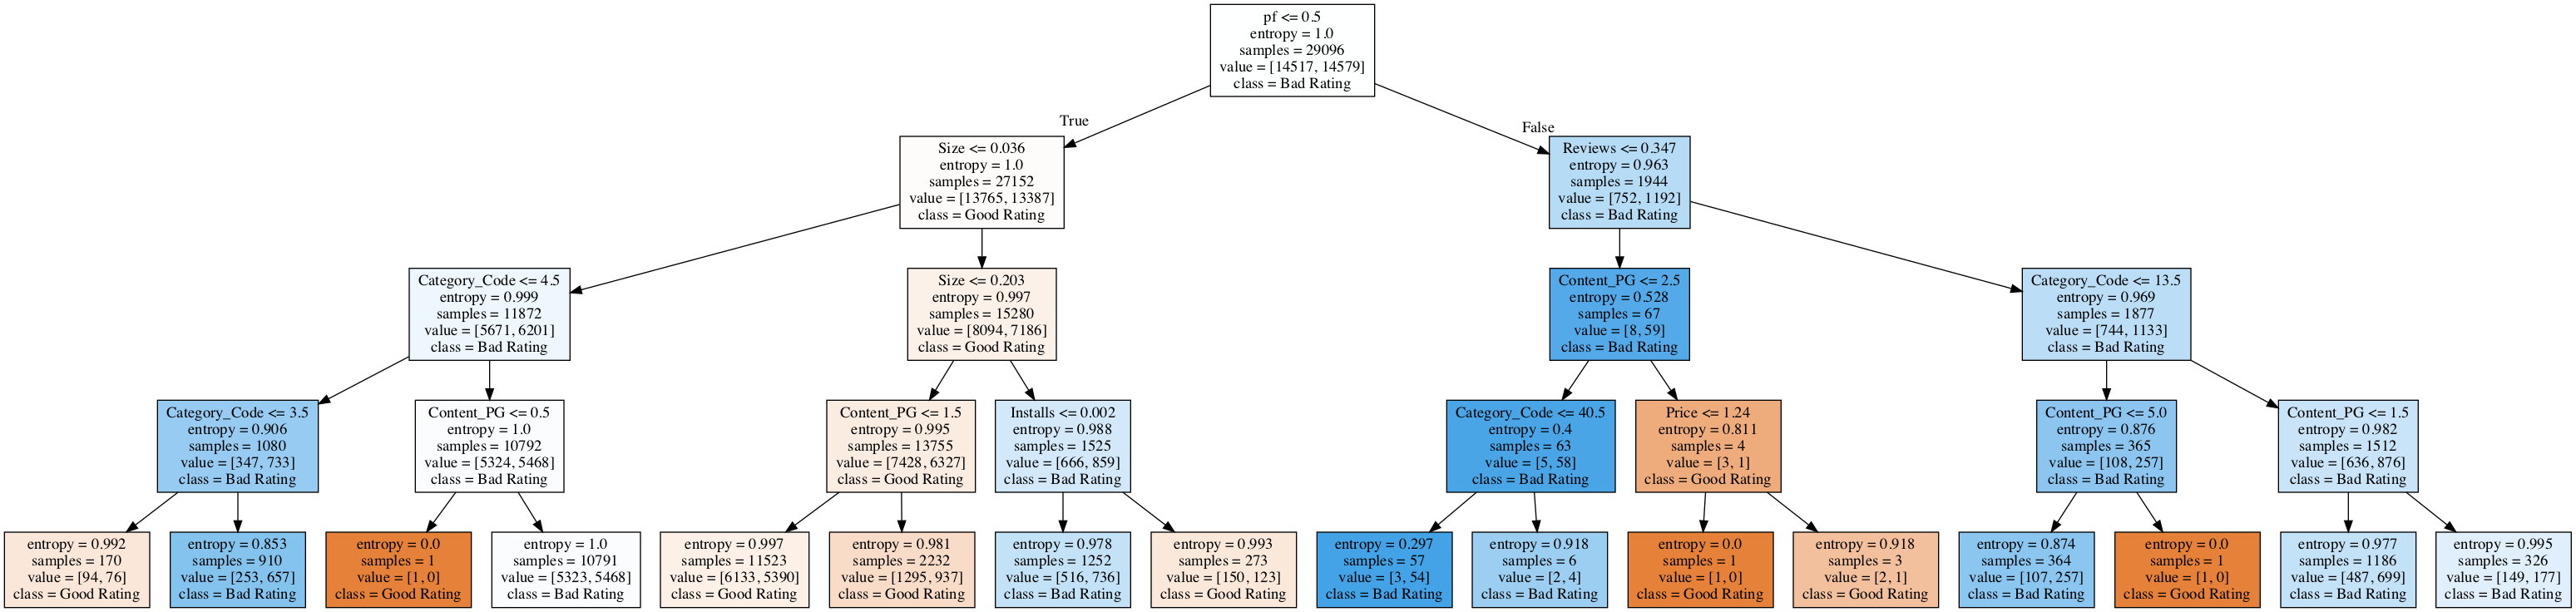

In [96]:
# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)
decision_tree.fit(X_train, y_train)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X_train.columns,
    class_names=['Good Rating', 'Bad Rating'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Decision Tree Classifier after binarizing the target "Rating"

In [97]:
##Decision Tree
lr_b = tree.DecisionTreeClassifier()
lr_b.fit(X_train,y_train)
predictions_lrb = lr_b.predict(X_test)
report = classification_report(y_test, predictions_lrb)

print(report)

              precision    recall  f1-score   support

           0       0.82      0.69      0.75      6266
           1       0.73      0.85      0.79      6204

    accuracy                           0.77     12470
   macro avg       0.78      0.77      0.77     12470
weighted avg       0.78      0.77      0.77     12470



In [98]:
from sklearn.metrics import roc_curve, precision_recall_curve
probs = lr_b.predict_proba(X_test)[:, 1]
print(probs[1:30])
fpr, tpr, thresholds = roc_curve(y_test, probs)

[0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1.
 1. 0. 1. 1. 0.]


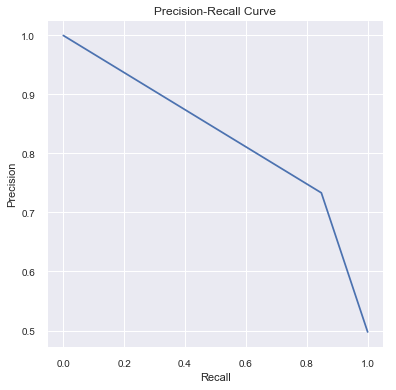

In [99]:
pres, rec, thresholds = precision_recall_curve(y_test, predictions_lrb)
fig = plt.figure(figsize = (6, 6))
plt.plot(rec, pres)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

#### We see a sudden drop in precision as recall increases until 0.58 precision and it starts to drop smooth after that which is expected. 

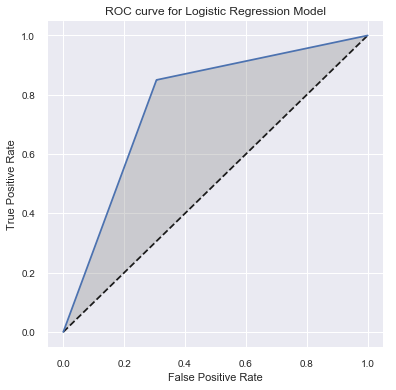

In [100]:
fig = plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.fill(fpr, tpr, 'grey', alpha=0.3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression Model')
plt.show()

In [101]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('Area under the ROC curve: {:.3f}'.format(auc))

Area under the ROC curve: 0.772


#### To calculate the area under the curve (AUC) we use the roc_auc_score function from sklearn.metrics. 

### Random Forest 

In [102]:
lr_r = RandomForestClassifier(n_estimators=24)
lr_r.fit(X_train,y_train)
predictions_lrr = lr_r.predict(X_test)
report = classification_report(y_test, predictions_lrr)

print(report)

              precision    recall  f1-score   support

           0       0.83      0.73      0.78      6266
           1       0.76      0.85      0.80      6204

    accuracy                           0.79     12470
   macro avg       0.79      0.79      0.79     12470
weighted avg       0.79      0.79      0.79     12470



### Logistic Regression

In [103]:
lrb = LogisticRegression(solver='lbfgs', max_iter = 10000, random_state = 40, multi_class='multinomial')
lrb.fit(X_train, y_train)

test_score = lrb.score(X_test, y_test)
train_score = lrb.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

Score on training data:  0.5326161671707451
Score on test data:  0.5188452285485164


In [104]:
predictions_lrb = lrb.predict(X_test)
report = classification_report(y_test, predictions_lrb)

print(report)

              precision    recall  f1-score   support

           0       0.52      0.58      0.55      6266
           1       0.52      0.46      0.49      6204

    accuracy                           0.52     12470
   macro avg       0.52      0.52      0.52     12470
weighted avg       0.52      0.52      0.52     12470



### Gradient Boosting Classifier

In [105]:
params_new = {'n_estimators': 1000,
          'max_depth': 3,
          'loss': 'exponential'}

# Initialize and fit the model.
clf_new = ensemble.GradientBoostingClassifier(**params_new)
clf_new.fit(X_train, y_train)

predict_train_new = clf_new.predict(X_train)
predict_test_new = clf_new.predict(X_test)

In [106]:
clf_new.score(X_test, y_test)

0.6764234161988774

In [107]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test,predict_test_new)

0.6736589271417134

In [108]:
recall_score(y_test,predict_test_new)

0.6781108961960026

In [109]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=24)
knn.fit(X_train, y_train)

print(knn.score(X_train, y_train))

knn_w = neighbors.KNeighborsClassifier(n_neighbors=24, weights='distance')
knn_w.fit(X_train, y_train)

print(knn_w.score(X_train, y_train))

0.6577536431124553
0.9988314544954633
